### Nama: Nabila Putri Damayanti
### No. Peserta: PYTN-KS18-021
### Batch: 5

Kasus:
Program ini dibuat untuk menganalisis berdasarkan beberapa model yang dibangun dengan metode yang berbeda, model mana yang memiliki akurasi atau ketepatan tertinggi dalam memprediksi apakah klien sudah berlangganan deposito berjangka?

Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric)
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

#### Import Pustaka yang dibutuhkan

In [1]:
pip install smote-variants

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.2/416.2 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.4 MB/s eta 0:00:00
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10588 sha256=4bad68b591399fee3213ec8fc8ee361695712adb043dcfd79ddc16420922c54a
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
  Created wheel for statistics: filename=statistics-1.0.3.5-py3-none-any.whl size=7436 sha256=b7c2ecd2f0ac021cc84d495677d65f45f28b5d5967b7b6d377650572d2e515ce
  Stored in directory: /root/.cache/pip/wheels/59/bd/aa/41ad56fbb723d36e457b5be74feb992cdac2855a6999ba34a1
Successfully built minisom statistics


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.preprocessing import StandardScaler
import smote_variants as sv
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score, classification_report, roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

#### Import Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv("/content/drive/MyDrive/Colab/bank-additional-full.csv", sep=";", encoding='utf-8')

Melihat Header

In [5]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

Melihat 5 data teratas

In [6]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### Data Cleaning

Memeriksa missing value

In [7]:
data.isnull().sum()/data.shape[0]

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

Memeriksa data duplikat

In [8]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Length: 41188, dtype: bool

Memeriksa dan mengelompokkan kolom yang bertipe data numerik

In [9]:
numerical_cols=data.select_dtypes(exclude='object').columns

In [10]:
numerical_cols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

Memeriksa dan mengelompokkan kolom yang bertipe data object

In [11]:
categorical_cols=data.select_dtypes(include='object').columns

In [12]:
categorical_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

#### Eksplorasi dan Preprocessing Data

Melihat ukuran dataset

In [13]:
data.shape

(41188, 21)

Membaca informasi setiap kolom

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Menghitung total dari setiap data unik pada kolom y

In [15]:
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

Visualisasi distribusi data kolom y

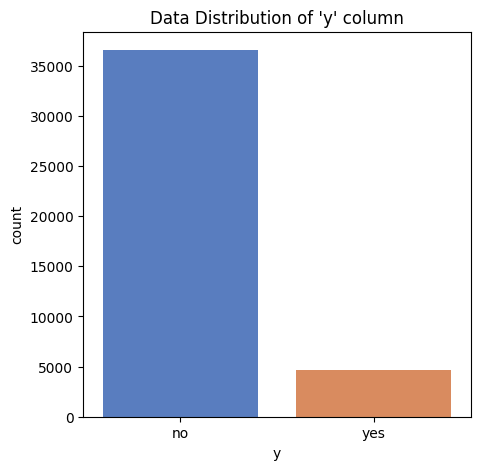

In [16]:
plt.figure(figsize=(5,5))
sns.countplot(x=data['y'], palette="muted")
plt.title("Data Distribution of 'y' column")
plt.show()

Visualisasi distribusi data pada kolom age

<Axes: xlabel='age', ylabel='Count'>

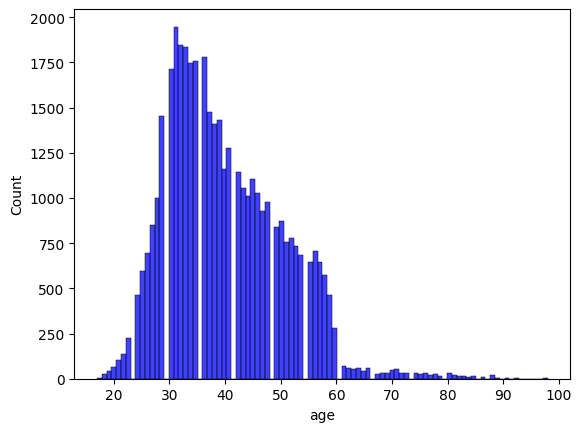

In [17]:
sns.histplot(x="age",data=data ,color = 'blue')

Visualisasi distribusi data pada kolom bertipe data numerik

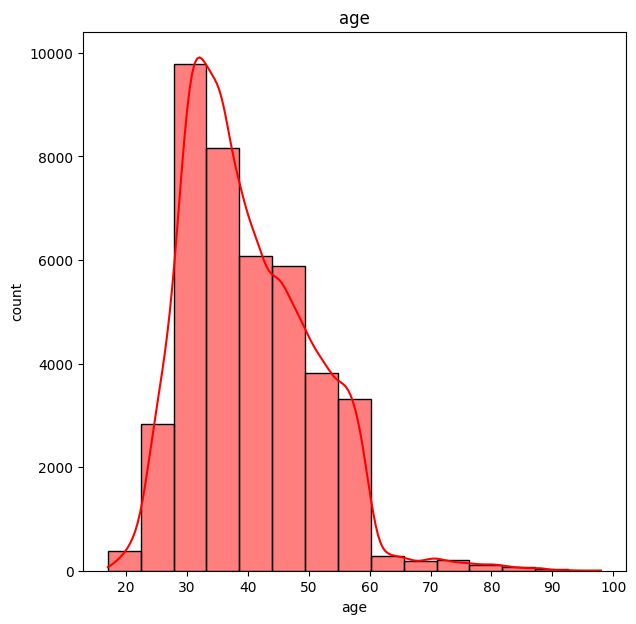

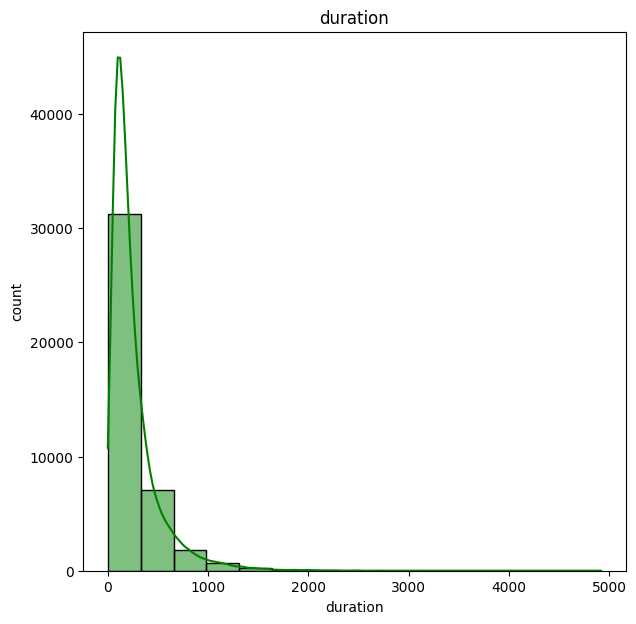

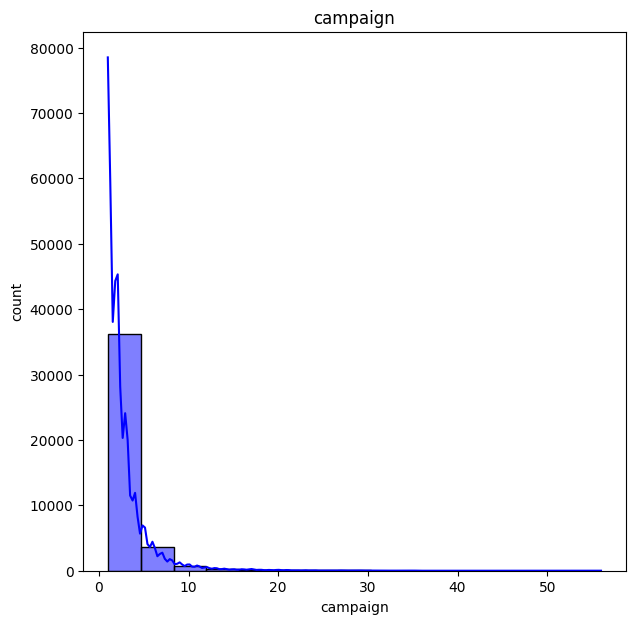

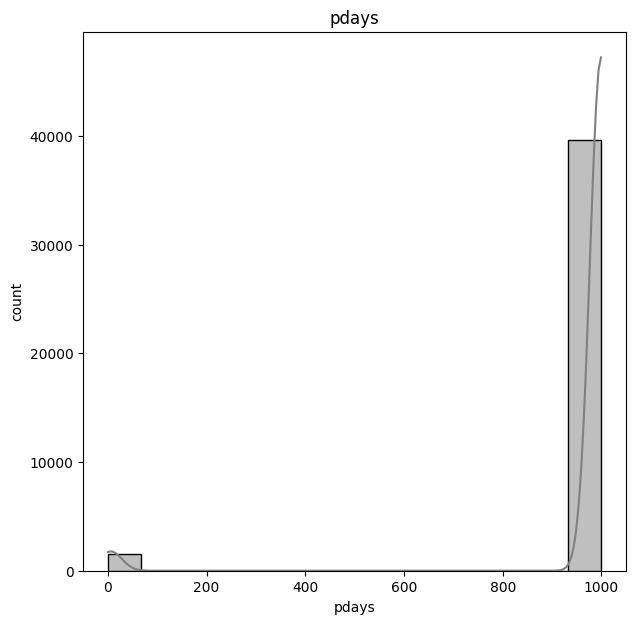

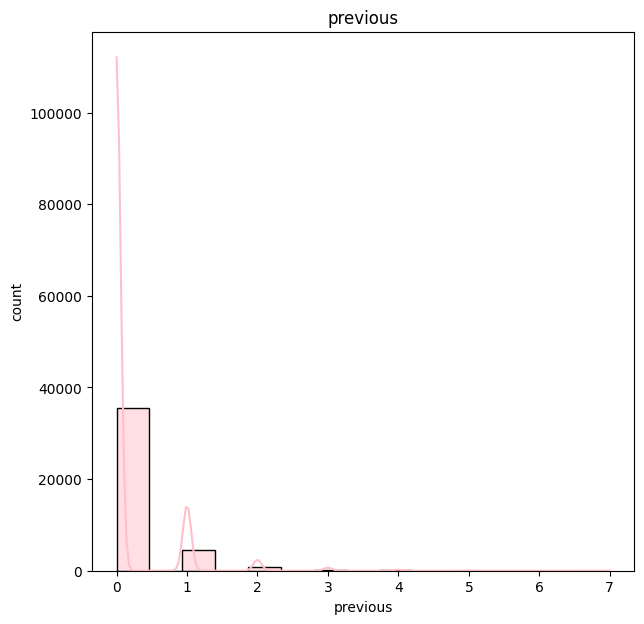

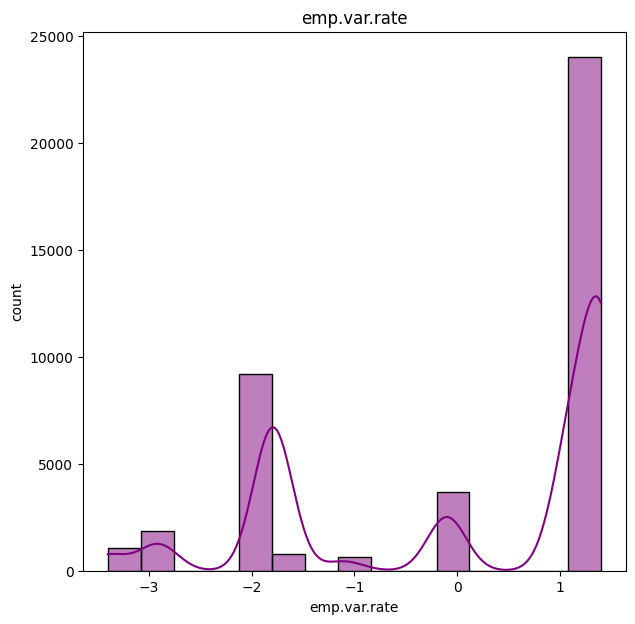

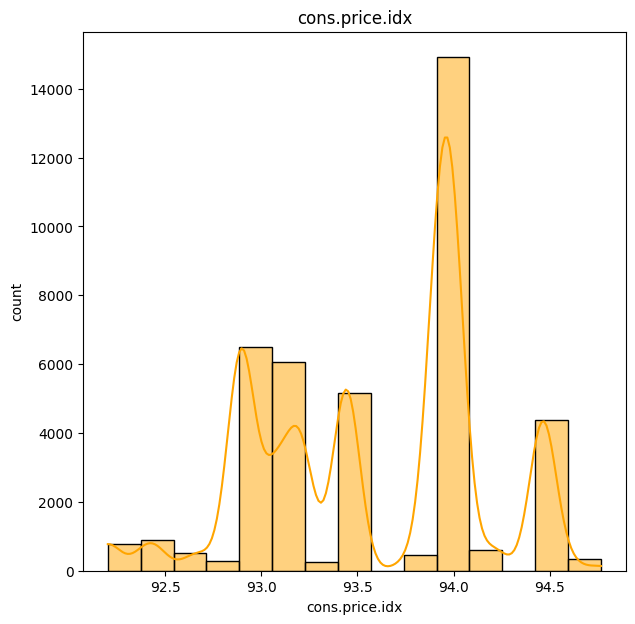

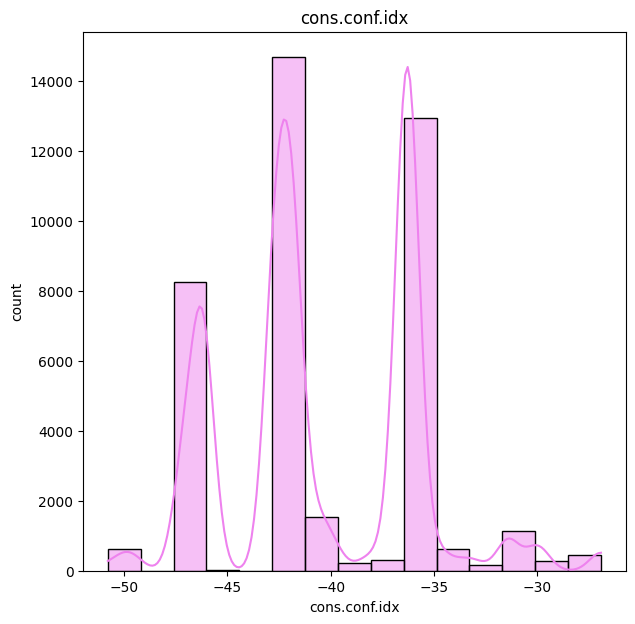

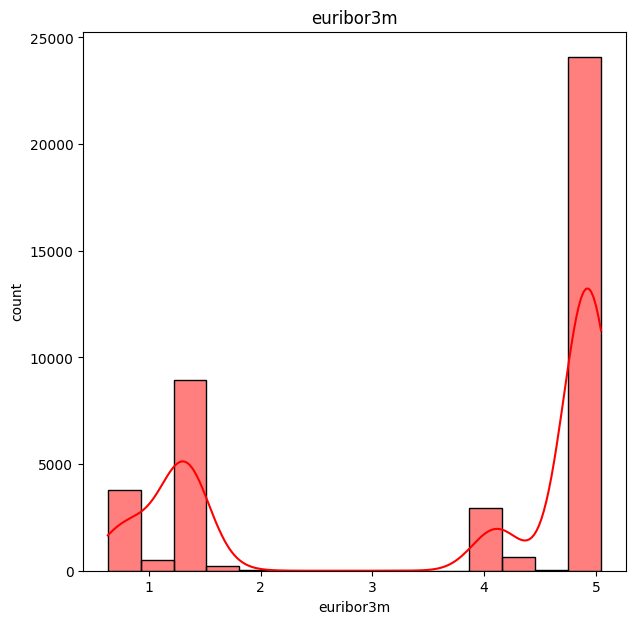

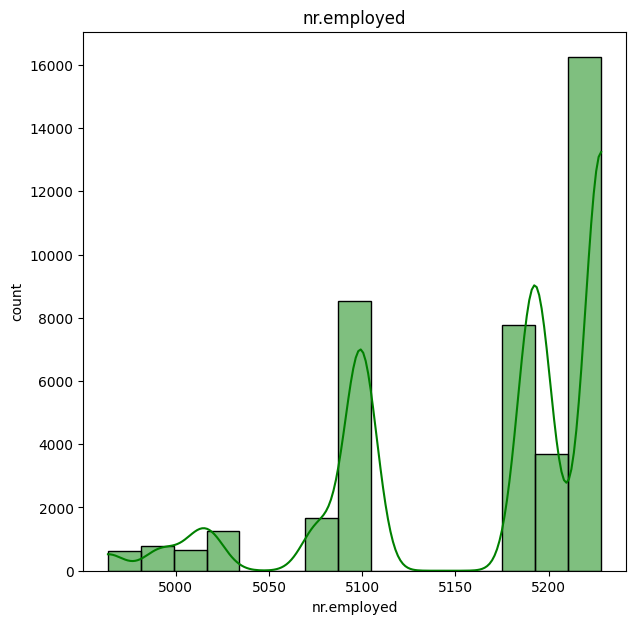

In [18]:
colors_list1=["red","green","blue","grey","pink", "purple","orange","violet","red","green","blue","grey","pink", "purple","orange","violet"]
for i in range(len(numerical_cols)):
    plt.figure(figsize=(7,7))
    sns.histplot(data[numerical_cols[i]], color=colors_list1[i], kde=True, bins=15)
    label=numerical_cols[i]
    plt.xlabel(numerical_cols[i])
    plt.ylabel("count")
    plt.title(label)

Visualisasi distribusi data pada kolom bertipe data object

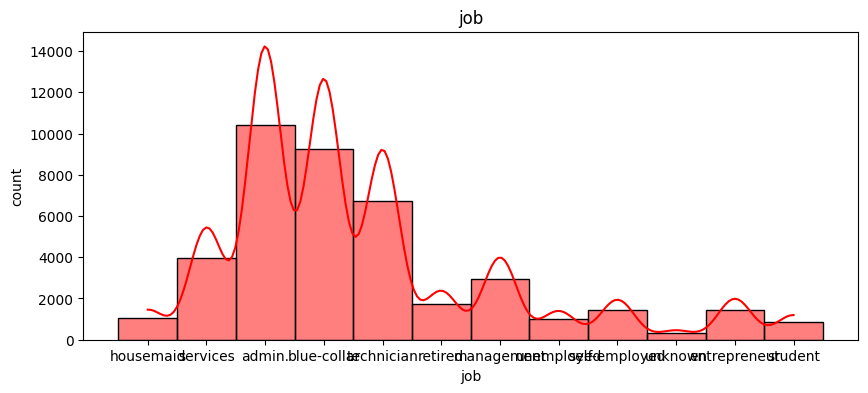

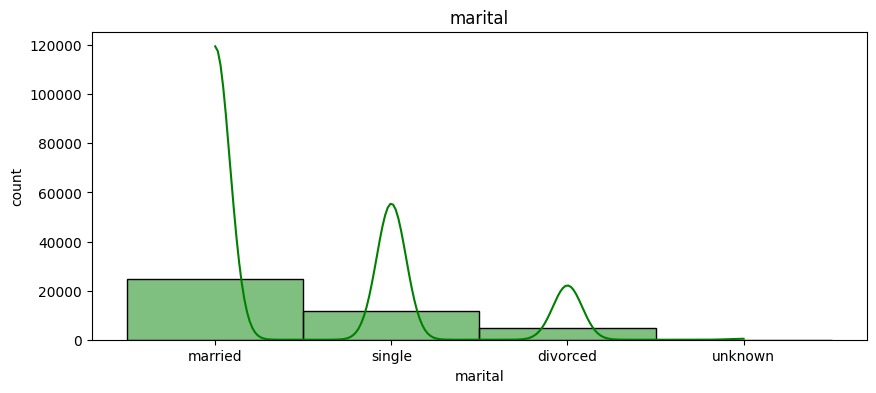

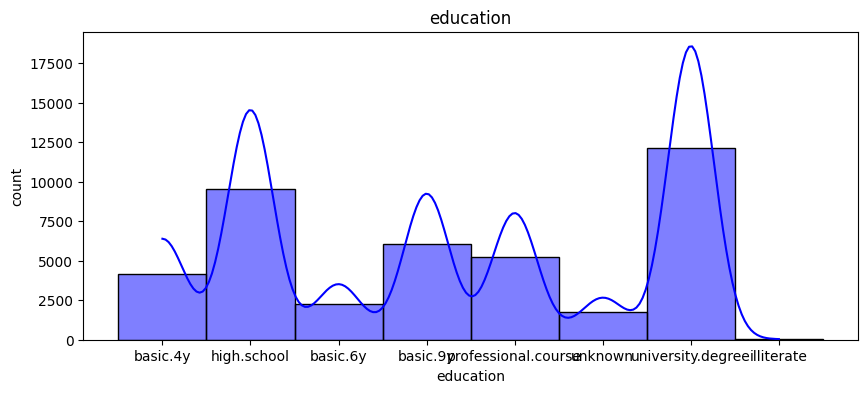

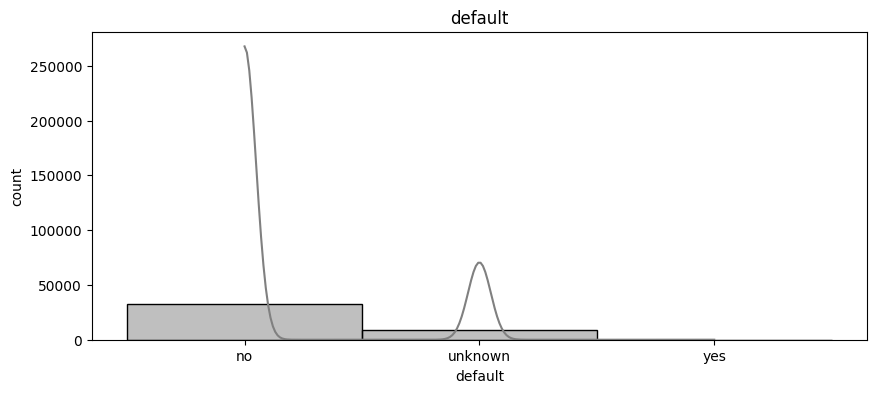

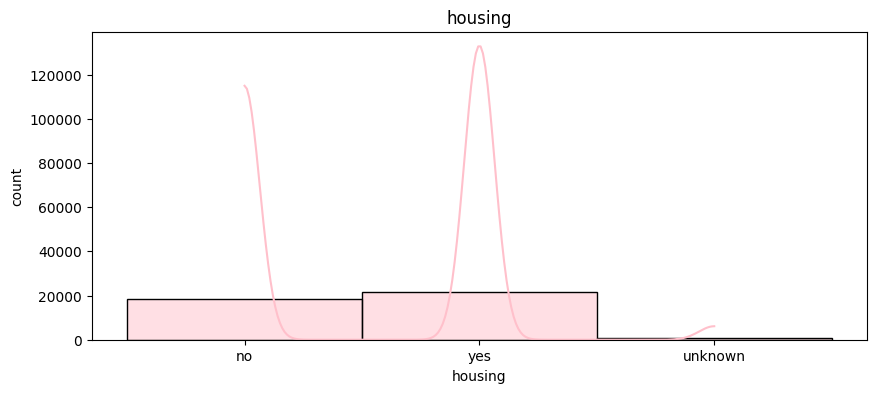

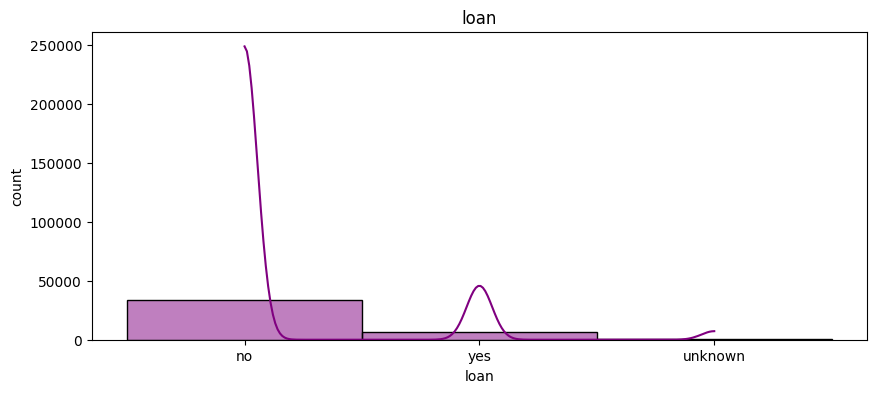

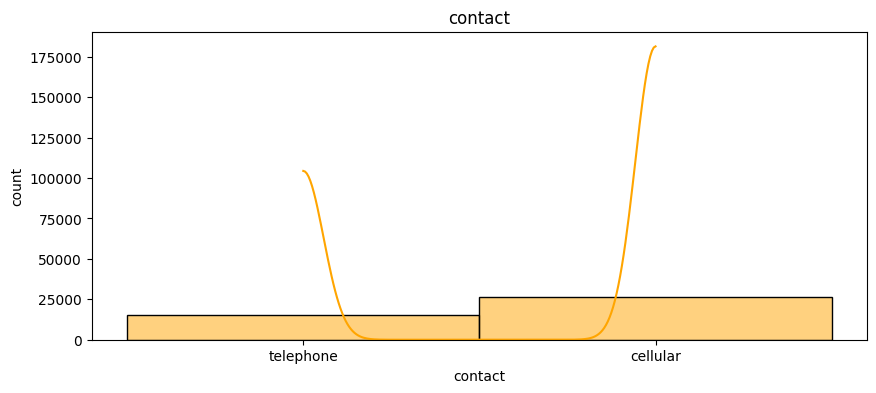

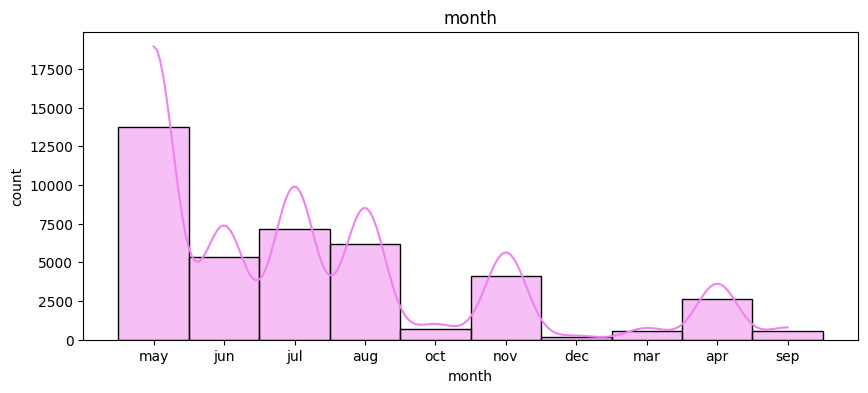

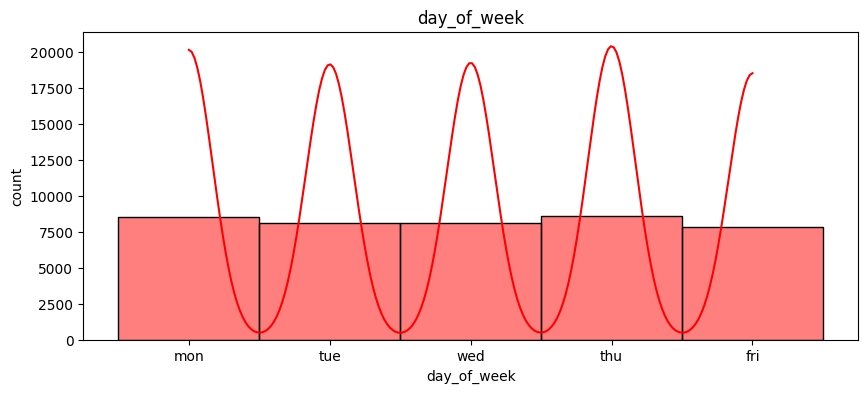

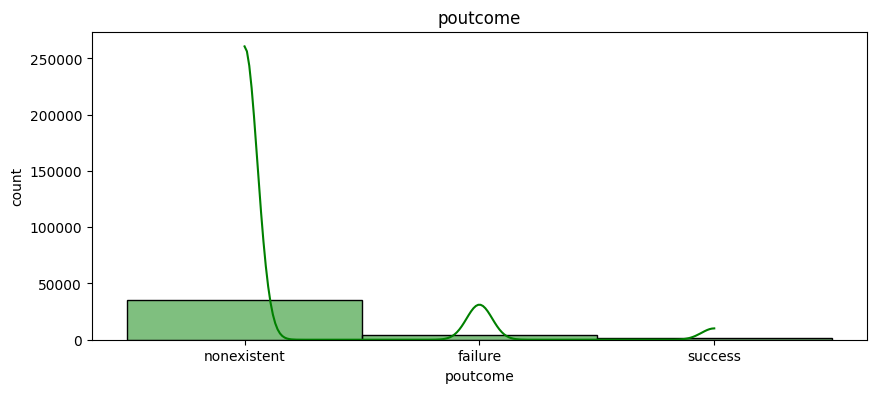

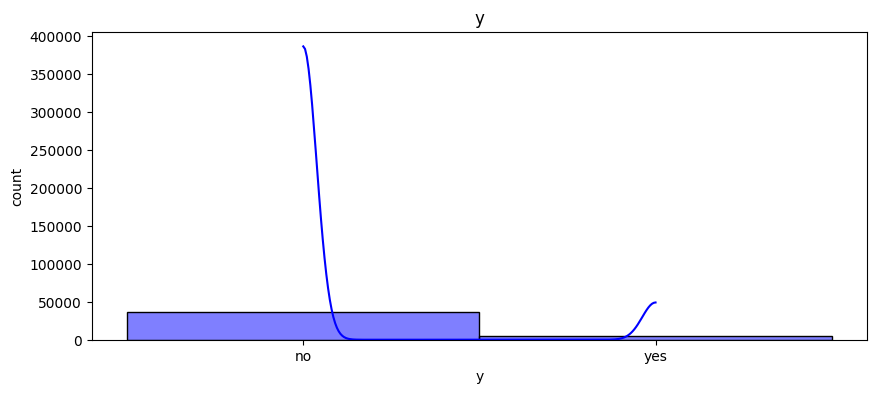

In [19]:
colors_list2=["red","green","blue","grey","pink", "purple","orange","violet","red", "green", "blue"]
for i in range(len(categorical_cols)):
    plt.figure(figsize=(10,4))
    sns.histplot(data[categorical_cols[i]], color=colors_list2[i], kde=True, bins=15)
    label=categorical_cols[i]
    plt.xlabel(categorical_cols[i])
    plt.ylabel("count")
    plt.title(label)

Membuat cross def tab untuk EDA

In [20]:
def cross_tab(df,f1,f2):
    jobs=list(df[f1].unique())
    edu=list(df[f2].unique())
    dataframes=[]
    for e in edu:
        dfe=data[data[f2]==e]
        dfejob=dfe.groupby(f1).count()[f2]
        dataframes.append(dfejob)
    xx=pd.concat(dataframes,axis=1)
    xx.columns=edu
    xx=xx.fillna(0)
    return xx

Membuat cross tab untuk variabel 'job' dan 'education'

In [21]:
cross_tab(data,'job','education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
job,,,,,,,,
admin.,77,3329,151,499,363,249,5753,1.0
blue-collar,2318,878,1426,3623,453,454,94,8.0
entrepreneur,137,234,71,210,135,57,610,2.0
housemaid,474,174,77,94,59,42,139,1.0
management,100,298,85,166,89,123,2063,0.0
retired,597,276,75,145,241,98,285,3.0
self-employed,93,118,25,220,168,29,765,3.0
services,132,2682,226,388,218,150,173,0.0
student,26,357,13,99,43,167,170,0.0


Mengisi 'unknown' data dengan relevan data

In [22]:
data.loc[(data['age']>60) & (data['job']=='unknown'), 'job'] = 'retired'
data.loc[(data['education']=='unknown') & (data['job']=='management'), 'education'] = 'university.degree'
data.loc[(data['education']=='unknown') & (data['job']=='services'), 'education'] = 'high.school'
data.loc[(data['education']=='unknown') & (data['job']=='housemaid'), 'education'] = 'basic.4y'
data.loc[(data['job'] == 'unknown') & (data['education']=='basic.4y'), 'job'] = 'blue-collar'
data.loc[(data['job'] == 'unknown') & (data['education']=='basic.6y'), 'job'] = 'blue-collar'
data.loc[(data['job'] == 'unknown') & (data['education']=='basic.9y'), 'job'] = 'blue-collar'
data.loc[(data['job']=='unknown') & (data['education']=='professional.course'), 'job'] = 'technician'

Memeriksa apakah sudah terisi dengan cross tab

In [23]:
cross_tab(data,'job','education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
job,,,,,,,,
admin.,77.0,3329,151.0,499.0,363.0,249.0,5753,1.0
blue-collar,2366.0,878,1448.0,3654.0,453.0,454.0,94,8.0
entrepreneur,137.0,234,71.0,210.0,135.0,57.0,610,2.0
housemaid,516.0,174,77.0,94.0,59.0,0.0,139,1.0
management,100.0,298,85.0,166.0,89.0,0.0,2186,0.0
retired,601.0,276,75.0,145.0,243.0,112.0,286,3.0
self-employed,93.0,118,25.0,220.0,168.0,29.0,765,3.0
services,132.0,2832,226.0,388.0,218.0,0.0,173,0.0
student,26.0,357,13.0,99.0,43.0,167.0,170,0.0


Membuat cross tab untuk variabel job dan housingb

In [24]:
cross_tab(data,'job','housing')

,no,yes,unknown
job,,,
admin.,4636,5559,227
blue-collar,4362,4752,241
entrepreneur,641,779,36
housemaid,491,540,29
management,1363,1490,71
retired,789,908,44
self-employed,641,740,40
services,1818,2050,101
student,381,471,23


Menghapus bagian yang memiliki banyak 'unknown'

In [25]:
data = data[data.housing != 'unknown']
data = data[data.loan != 'unknown']
data = data[data.default != 'unknown']
data = data[data.job != 'unknown']
data = data[data.marital != 'unknown']
data = data[data.education != 'unknown']

Melihat shape setelah preprocessing

In [26]:
data.shape

(30793, 21)

Memeriksa missing value

In [27]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Memeriksa data duplikat

In [28]:
data.duplicated().sum()

10

Menghapus data duplikat

In [29]:
data.drop_duplicates(inplace=True)

Memeriksa korelasi antar kolom

In [30]:
data.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.007896,-0.003073,-0.051873,0.050279,-0.051430,-0.036751,0.126009,-0.037021,-0.065043
duration,0.007896,1.000000,-0.067802,-0.046966,0.018432,-0.023338,0.012629,-0.008900,-0.028913,-0.040375
campaign,-0.003073,-0.067802,1.000000,0.054510,-0.080503,0.157086,0.127090,-0.012728,0.140169,0.147593
pdays,-0.051873,-0.046966,0.054510,1.000000,-0.591716,0.269785,0.068910,-0.102662,0.296350,0.371857
previous,0.050279,0.018432,-0.080503,-0.591716,1.000000,-0.403568,-0.176940,-0.027065,-0.439119,-0.488582
emp.var.rate,-0.051430,-0.023338,0.157086,0.269785,-0.403568,1.000000,0.766420,0.155840,0.969419,0.900525
cons.price.idx,-0.036751,0.012629,0.127090,0.068910,-0.176940,0.766420,1.000000,0.026457,0.667698,0.489633
cons.conf.idx,0.126009,-0.008900,-0.012728,-0.102662,-0.027065,0.155840,0.026457,1.000000,0.241966,0.073388
euribor3m,-0.037021,-0.028913,0.140169,0.296350,-0.439119,0.969419,0.667698,0.241966,1.000000,0.944918
nr.employed,-0.065043,-0.040375,0.147593,0.371857,-0.488582,0.900525,0.489633,0.073388,0.944918,1.000000


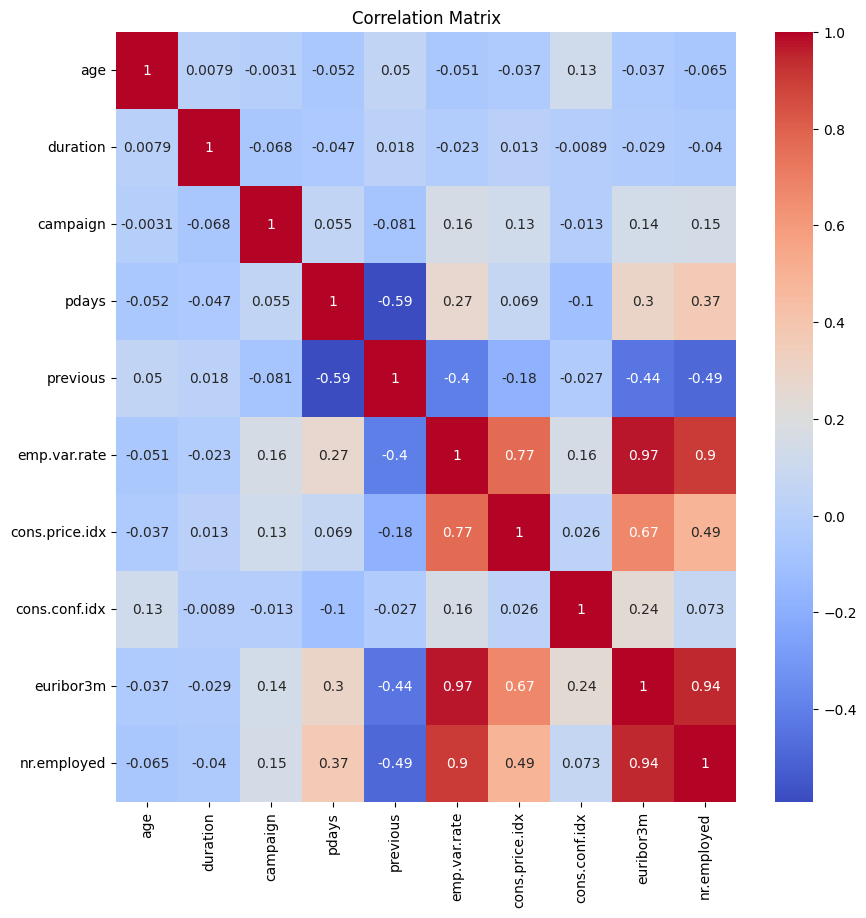

In [31]:
# Visualisasi korelasi antar kolom
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

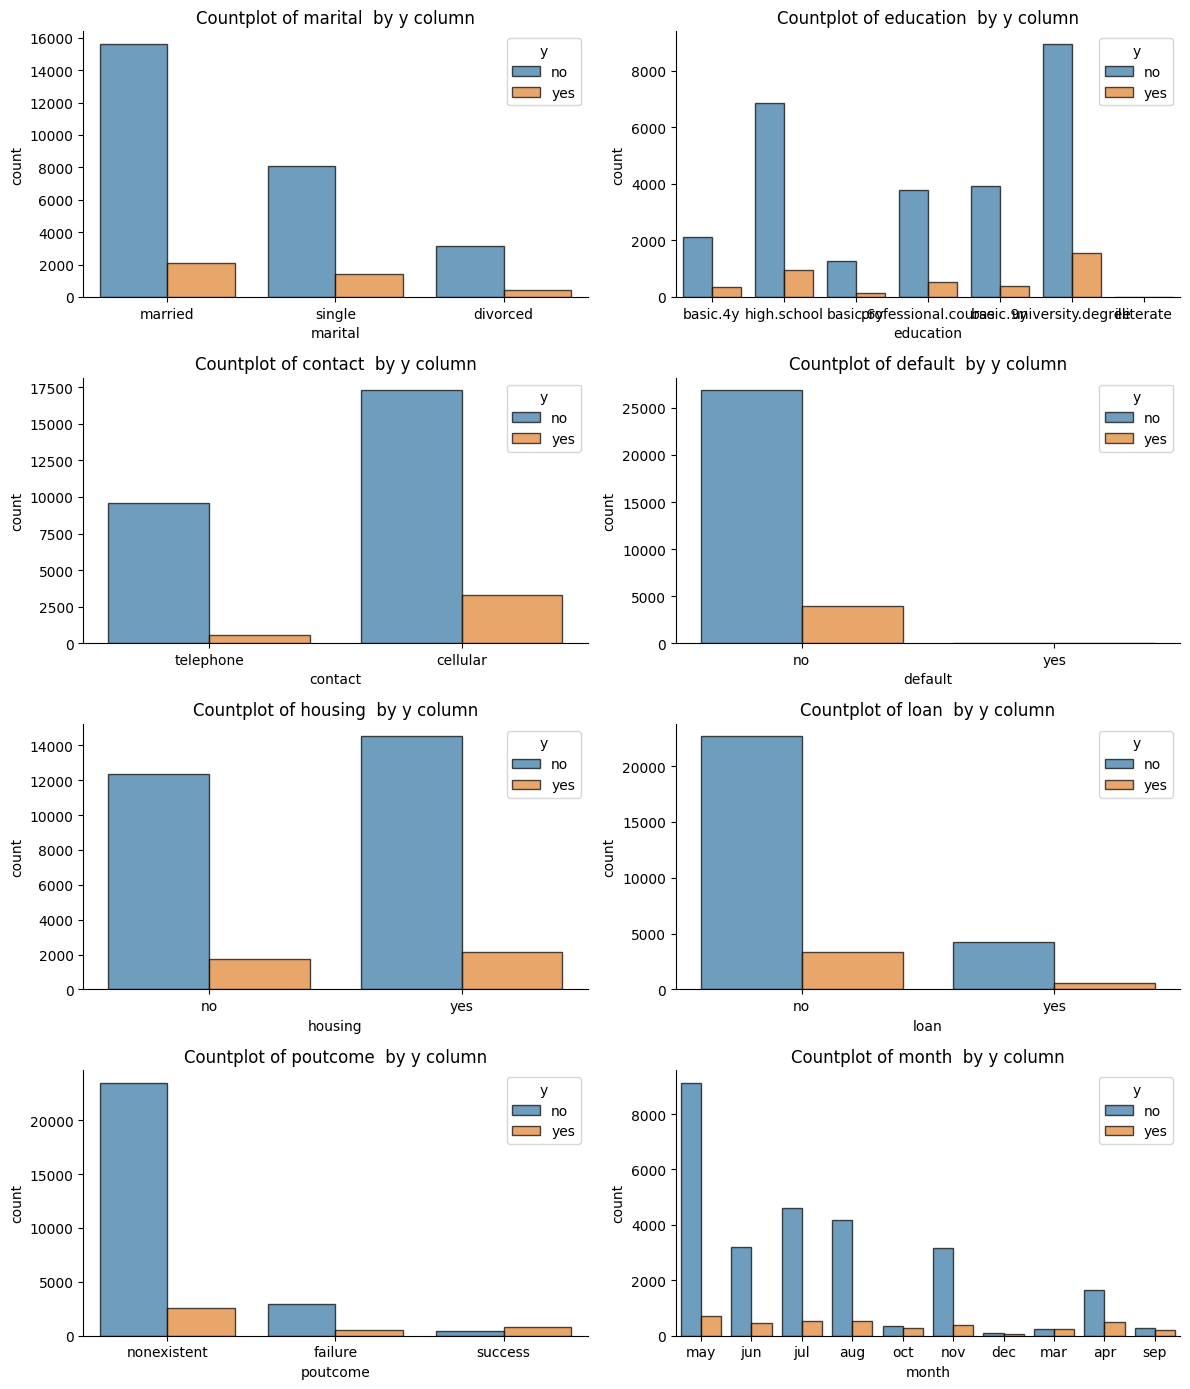

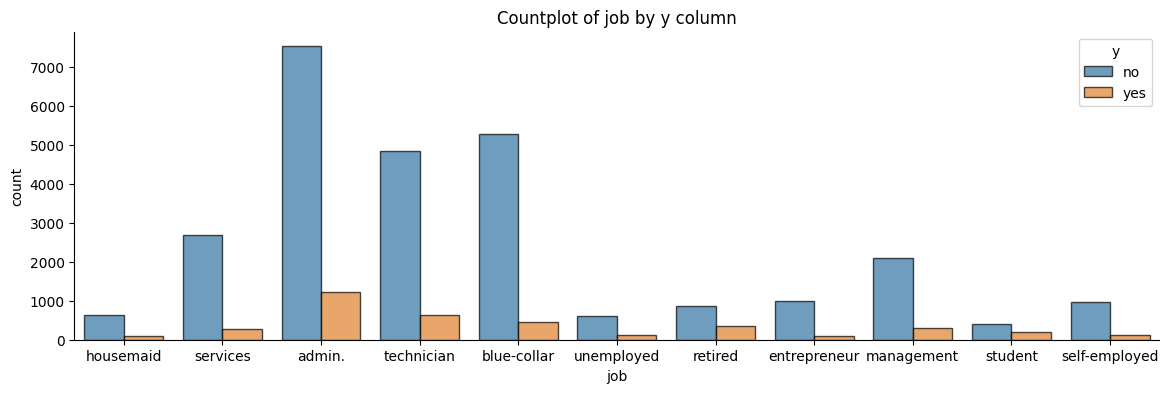

In [32]:
# Visualisasi korelasi kolom y dengan kolom lain
plt.figure(figsize=[12,14])
features=["marital", "education", "contact", "default", "housing", "loan", "poutcome", "month"]
n=1
for f in features:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='y', edgecolor="black", alpha=0.7, data=data)
    sns.despine()
    plt.title("Countplot of {}  by y column".format(f))
    n=n+1
plt.tight_layout()
plt.show()

plt.figure(figsize=[14,4])
sns.countplot(x='job', hue='y',edgecolor="black", alpha=0.7, data=data)
sns.despine()
plt.title("Countplot of job by y column")
plt.show()

Convert categorical variables menjadi numerical variables

In [33]:
le=LabelEncoder()
for col in categorical_cols:
    data[col]= le.fit_transform(data[col])

Standardise numerical columns

In [34]:
scaler= MinMaxScaler()
data[numerical_cols]=scaler.fit_transform(data[numerical_cols])

Menskalakan kolom 'age', sehingga memiliki rata-rata 0 dan standard deviasi 1

In [35]:
standart_scaler = StandardScaler()
data["age"] = standart_scaler.fit_transform(data[['age']])

Melihat statistik deskriptif kolom

In [36]:
data.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,3.078300e+04,30783.000000,30783.000000,30783.000000,30783.000000,30783.000000,30783.000000,30783.000000,30783.000000,30783.000000,...,30783.000000,30783.000000,30783.000000,30783.000000,30783.000000,30783.000000,30783.000000,30783.000000,30783.000000,30783.000000
mean,-1.292609e-16,3.724101,1.192444,3.836371,0.000097,0.541695,0.156515,0.330605,4.251015,2.013936,...,0.036208,0.957053,0.027826,0.925673,0.693471,0.515589,0.427086,0.640852,0.745551,0.126791
std,1.000016e+00,3.602828,0.623067,1.992064,0.009872,0.498267,0.363349,0.470438,2.382850,1.399168,...,0.064753,0.202106,0.074919,0.383786,0.335608,0.228243,0.200389,0.402898,0.284155,0.332744
min,-2.132619e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.802485e-01,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.333333,0.340608,0.338912,0.153933,0.512287,0.000000
50%,-2.006612e-01,2.000000,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,4.000000,2.000000,...,0.023810,1.000000,0.000000,1.000000,0.937500,0.484412,0.376569,0.957153,0.859735,0.000000
75%,6.687199e-01,7.000000,2.000000,6.000000,0.000000,1.000000,0.000000,1.000000,6.000000,3.000000,...,0.047619,1.000000,0.000000,1.000000,1.000000,0.698753,0.602510,0.980957,1.000000,0.000000
max,5.402017e+00,10.000000,2.000000,6.000000,1.000000,1.000000,1.000000,1.000000,9.000000,4.000000,...,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Melakukan oversampling menggunakan SMOTE untuk  mengatasi data yang tidak seimbang

In [37]:
# Mendefinisikan kolom X dan Y
X = data.drop(['y'], axis = 1)
Y = data['y']

In [38]:
# Bagi dataset menjadi data pelatihan dan pengujian
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Pilih variasi SMOTE yang sesuai
oversampler = sv.MulticlassOversampling(oversampler="SMOTE", oversampler_params={'random_state':0})
X_oversampler, Y_oversampler = oversampler.sample(X_train, Y_train)

2023-10-27 12:57:13,205:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
INFO:smote_variants:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2023-10-27 12:57:13,212:INFO:MulticlassOversampling: Sampling minority class with label: 1
INFO:smote_variants:MulticlassOversampling: Sampling minority class with label: 1
2023-10-27 12:57:13,227:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': 0, 'class_name': 'SMOTE'}")
INFO:smote_variants:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': 0, 'class_name': 'SMOTE'}")

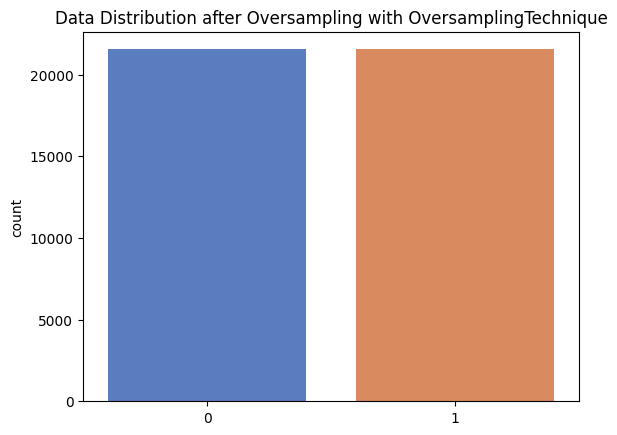

In [39]:
sns.countplot(x=Y_oversampler, palette="muted")
plt.title('Data Distribution after Oversampling with OversamplingTechnique')
plt.show()

In [40]:
# Membagi dataset menjadi data latih (80%) dan data uji (20%)
X_train , X_test ,Y_train, Y_test = train_test_split(X, Y,test_size=0.2 ,random_state= 0)

In [41]:
# Melihat ukuran tiap data yang telah dibagi shape
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((24626, 20), (24626,), (6157, 20), (6157,))

#### Bangun Model

Membuat fungsi untuk membangun model

In [42]:
def train_evaluate_model(model, X_train, Y_train, X_test,yellow_test):
    model.fit(X_train, Y_train)  # fit the model instance

    predictions = model.predict(X_test) # calculate predictions

    # compute metrics untuk evaluasi
    accuracy = accuracy_score(Y_test, predictions)
    f1 = f1_score(Y_test, predictions)
    precision = precision_score(Y_test, predictions)
    recall = recall_score(Y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(Y_test, predictions)

    # Buat dataframe untuk memvisualisasikan hasil
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy'])
    return eval_df

Logistic Regression

In [43]:
# Bangun model LR dengan penalty l2 dan parameter c=0.5
lr = LogisticRegression(penalty ="l2", C=0.5)
results = train_evaluate_model(lr, X_train, Y_train, X_test, Y_test)

In [44]:
# Pelabelan pada tabel result
results.index = ['LogisticRegression']

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      5345
           1       0.71      0.37      0.48       812

    accuracy                           0.90      6157
   macro avg       0.81      0.67      0.71      6157
weighted avg       0.88      0.90      0.88      6157

Accuracy:  0.8968653565047913


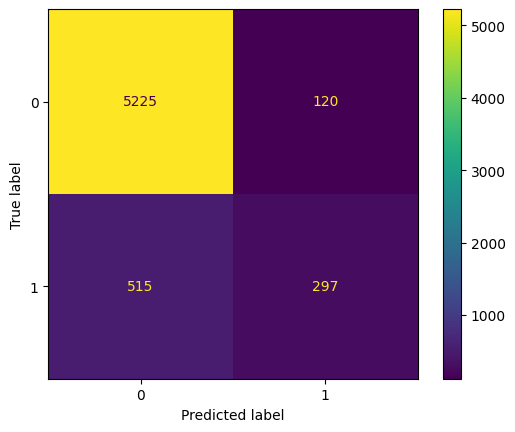

In [45]:
# Output menggunakan confusion matrix
predictions = lr.predict(X_test)
cm = confusion_matrix(Y_test, predictions)
print(classification_report(Y_test, predictions))
print("Accuracy: ", accuracy_score(Y_test, predictions))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

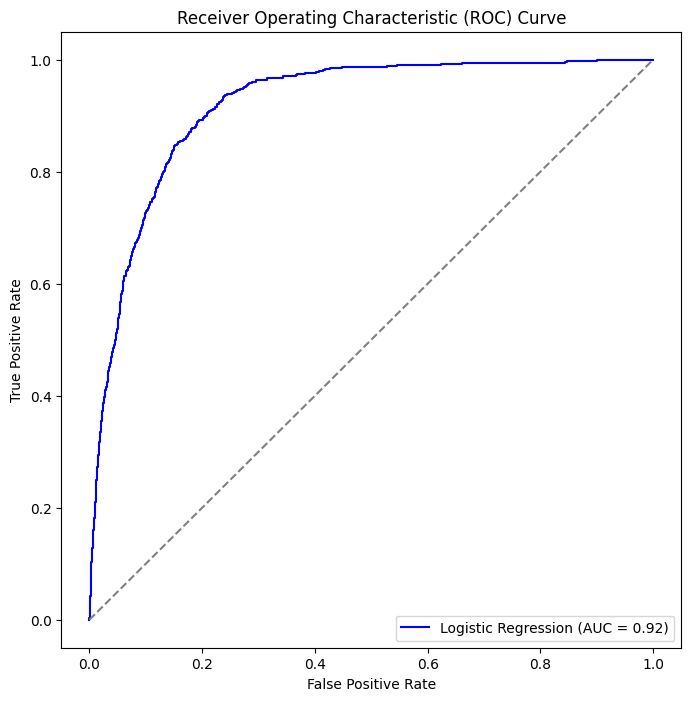

In [46]:
# Kurva ROC
# Melakukan prediksi probabilitas
y_prob = lr.predict_proba(X_test)[:,1]

# Menghitung nilai AUC-ROC
roc_auc = roc_auc_score(Y_test, y_prob)

# Menghitung false positive rate dan true positive rate
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)

# Menampilkan kurva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})', color='b')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

K Nearest Neighbors (KNN)

In [47]:
# Bangun model KNN dengan n_neighbors=13 dan metric minkowski
knn = KNeighborsClassifier(n_neighbors=13,metric="minkowski")
knn_result = train_evaluate_model(knn, X_train, Y_train, X_test, Y_test)

In [48]:
# Pelabelan pada tabel result
knn_result.index =['KNearsNeighbors']

              precision    recall  f1-score   support

           0       0.89      0.99      0.93      5345
           1       0.63      0.16      0.26       812

    accuracy                           0.88      6157
   macro avg       0.76      0.57      0.60      6157
weighted avg       0.85      0.88      0.84      6157

Accuracy:  0.8772129283742082


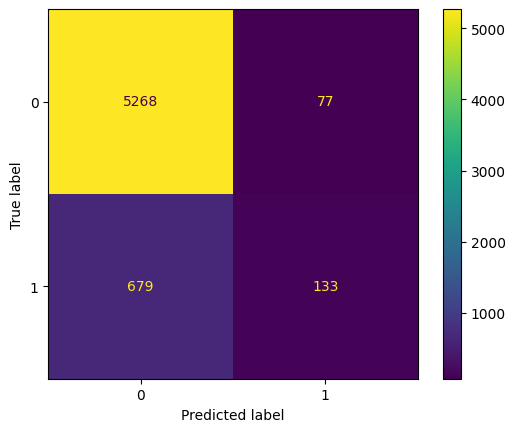

In [49]:
# Output menggunakan confusion matrix
predictions = knn.predict(X_test)
cm = confusion_matrix(Y_test, predictions)
print(classification_report(Y_test, predictions))
print("Accuracy: ", accuracy_score(Y_test, predictions))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

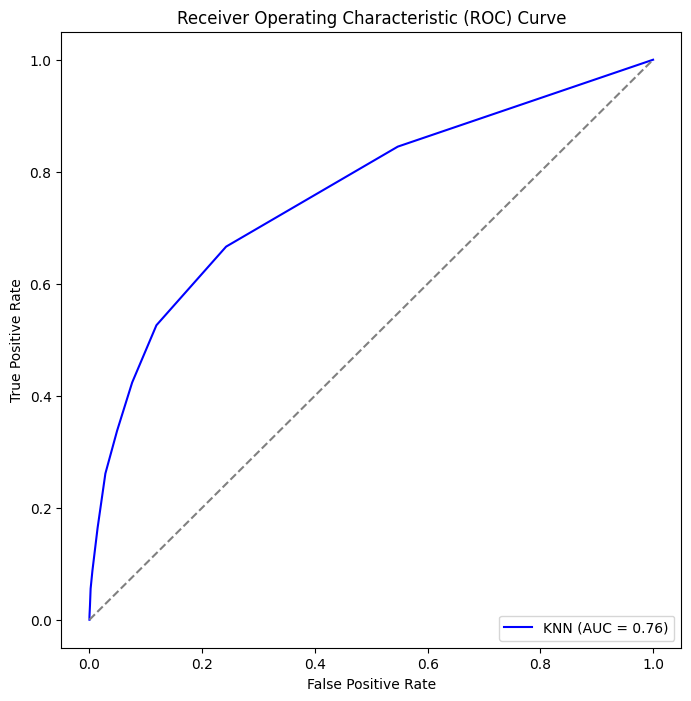

In [50]:
# Kurva ROC
# Melakukan prediksi probabilitas
y_prob = knn.predict_proba(X_test)[:,1]

# Menghitung nilai AUC-ROC
roc_auc = roc_auc_score(Y_test, y_prob)

# Menghitung false positive rate dan true positive rate
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)

# Menampilkan kurva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'KNN (AUC = {roc_auc:.2f})', color='b')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Support Vector Machine (SVM)

In [51]:
# Bangun model SVM dengan probability True dan random state=0
SVM = SVC(probability=True, random_state = 0)
SVM_result = train_evaluate_model(SVM, X_train, Y_train, X_test, Y_test)

In [52]:
# Pelabelan pada tabel result
SVM_result.index = ['SVM']

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      5345
           1       0.64      0.21      0.31       812

    accuracy                           0.88      6157
   macro avg       0.76      0.59      0.62      6157
weighted avg       0.86      0.88      0.85      6157

Accuracy:  0.8798115965567647


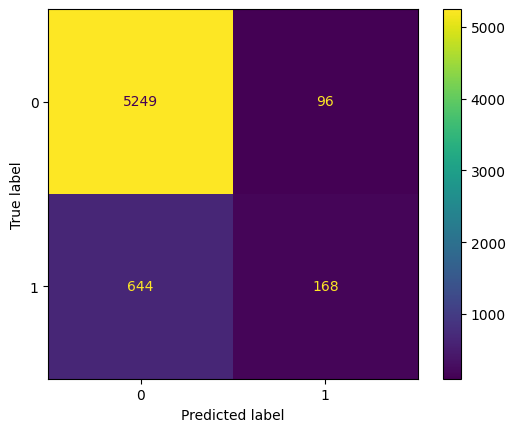

In [53]:
# Output confusion matrix
predictions = SVM.predict(X_test)
cm = confusion_matrix(Y_test, predictions)
print(classification_report(Y_test, predictions))
print("Accuracy: ", accuracy_score(Y_test, predictions))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

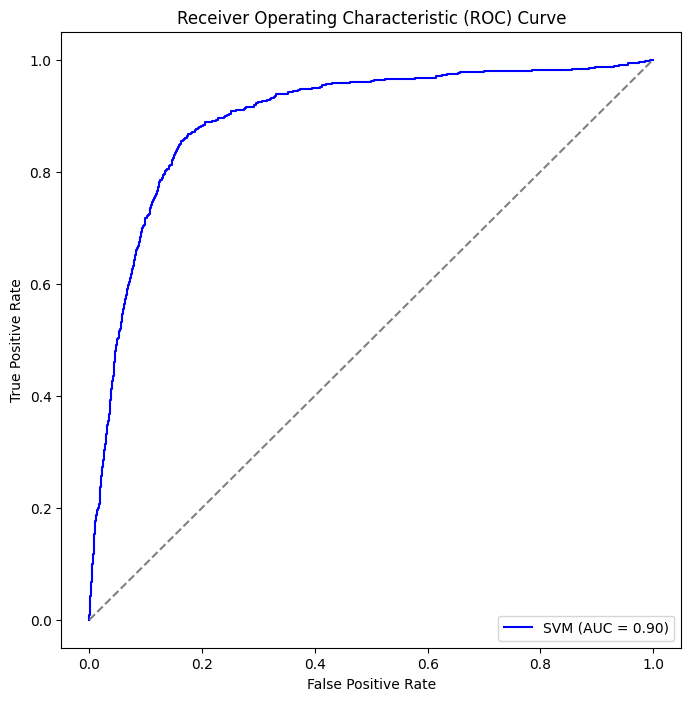

In [54]:
# Kurva ROC
# Melakukan prediksi probabilitas
y_prob = SVM.decision_function(X_test)

# Menghitung nilai AUC-ROC
roc_auc = roc_auc_score(Y_test, y_prob)

# Menghitung false positive rate dan true positive rate
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)

# Menampilkan kurva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'SVM (AUC = {roc_auc:.2f})', color='b')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Decision Tree

In [55]:
# Bangun model DT dengan max depth=5 dan max features=4
dt = DecisionTreeClassifier(max_depth= 5, max_features=4)
dt_result = train_evaluate_model(dt, X_train, Y_train, X_test, Y_test)

In [56]:
# Pelabelan pada tabel result
dt_result.index = ['DecisionTree']

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      5345
           1       0.74      0.27      0.39       812

    accuracy                           0.89      6157
   macro avg       0.82      0.63      0.67      6157
weighted avg       0.88      0.89      0.87      6157

0.8910183530940393


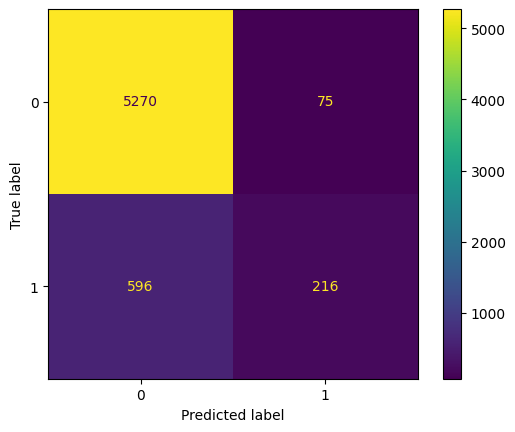

In [57]:
# Output confusion matrix
predictions = dt.predict(X_test)
cm = confusion_matrix(Y_test, predictions)
print(classification_report(Y_test, predictions))
print(accuracy_score(Y_test, predictions))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

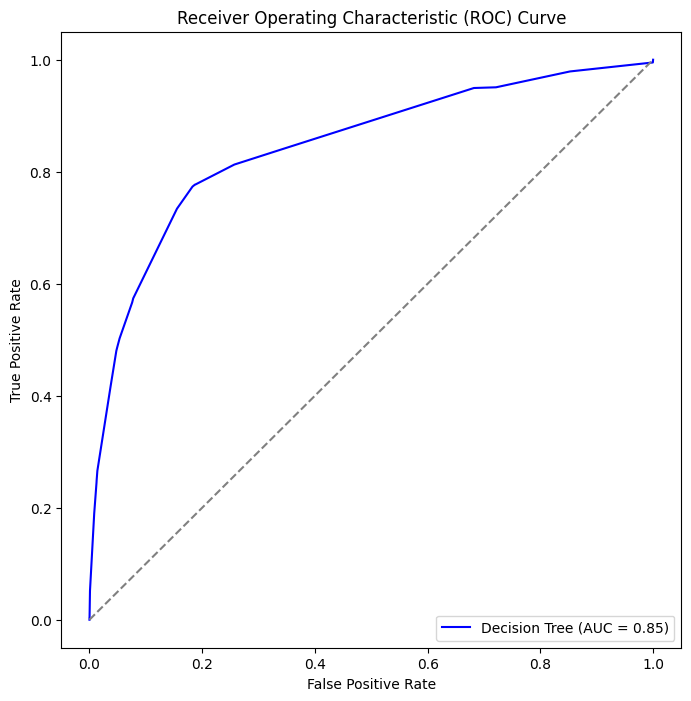

In [58]:
# Kurva ROC
# Melakukan prediksi probabilitas
y_prob = dt.predict_proba(X_test)[:,1]

# Menghitung nilai AUC-ROC
roc_auc = roc_auc_score(Y_test, y_prob)

# Menghitung false positive rate dan true positive rate
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)

# Menampilkan kurva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc:.2f})', color='b')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Random Forest

In [59]:
# Bangun model RF dengan max features=9, min samples split=4, dan n estimators=91
rf = RandomForestClassifier(max_features=9, min_samples_split=4, n_estimators=91)
rf_result = train_evaluate_model(rf, X_train, Y_train, X_test, Y_test)

In [60]:
# Pelabelan pada tabel result
rf_result.index = ['RandomForest']

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      5345
           1       0.66      0.58      0.62       812

    accuracy                           0.90      6157
   macro avg       0.80      0.77      0.78      6157
weighted avg       0.90      0.90      0.90      6157

0.9046613610524606


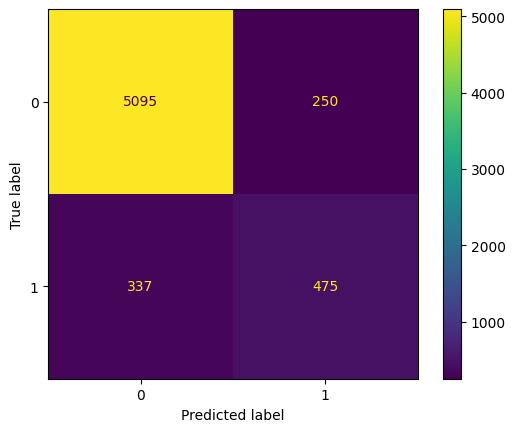

In [61]:
# Output confusion matrix
predictions = rf.predict(X_test)
cm = confusion_matrix(Y_test, predictions)
print(classification_report(Y_test, predictions))
print(accuracy_score(Y_test, predictions))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

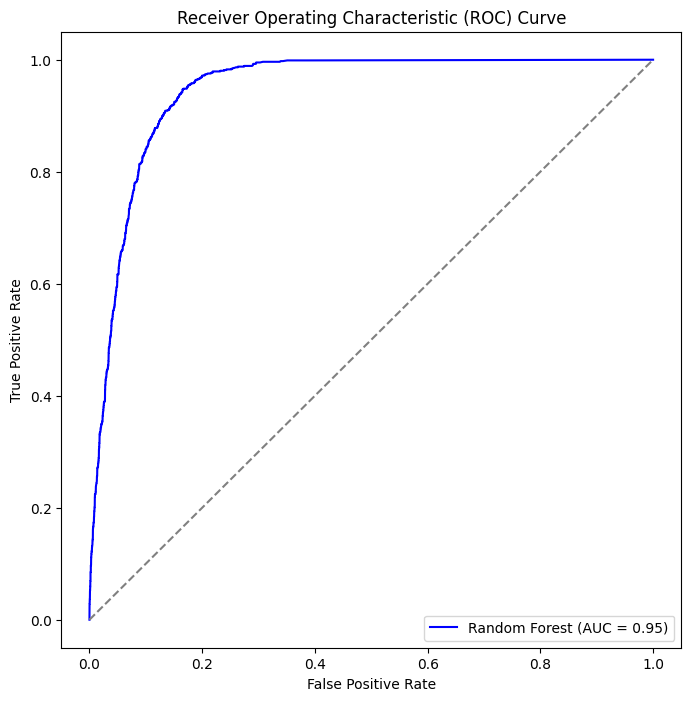

In [62]:
# Kurva ROC
# Melakukan prediksi probabilitas
y_prob = rf.predict_proba(X_test)[:,1]

# Menghitung nilai AUC-ROC
roc_auc = roc_auc_score(Y_test, y_prob)

# Menghitung false positive rate dan true positive rate
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)

# Menampilkan kurva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})', color='b')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Naive Bayes

In [63]:
# Bangun model NB
nb = GaussianNB()
nb_result = train_evaluate_model(nb, X_train, Y_train, X_test, Y_test)

In [64]:
# Pelabelan pada tabel result
nb_result.index = ['NaiveBayes']

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      5345
           1       0.41      0.59      0.48       812

    accuracy                           0.83      6157
   macro avg       0.67      0.73      0.69      6157
weighted avg       0.86      0.83      0.84      6157

0.8322234854636998


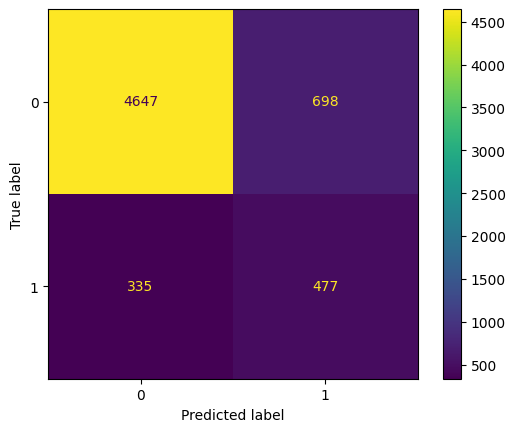

In [65]:
# Output confusion matrix
predictions = nb.predict(X_test)
cm = confusion_matrix(Y_test, predictions)
print(classification_report(Y_test, predictions))
print(accuracy_score(Y_test, predictions))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

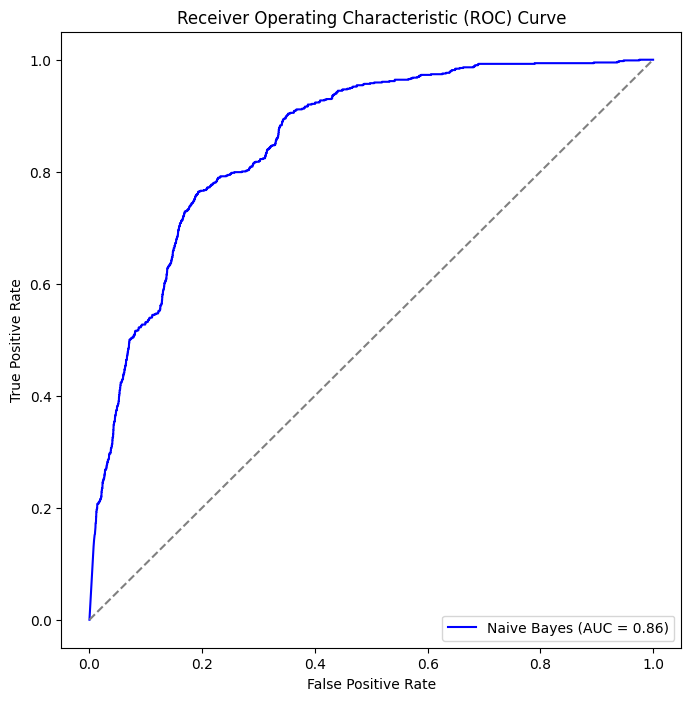

In [66]:
# Kurva ROC
# Melakukan prediksi probabilitas
y_prob = nb.predict_proba(X_test)[:,1]

# Menghitung nilai AUC-ROC
roc_auc = roc_auc_score(Y_test, y_prob)

# Menghitung false positive rate dan true positive rate
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)

# Menampilkan kurva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'Naive Bayes (AUC = {roc_auc:.2f})', color='b')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Tabel Result

In [67]:
# Menyatukan hasil prediksi
results = pd.concat([results, knn_result, SVM_result, nb_result, dt_result, rf_result])

# Menyortir hasil berdasarkan f1_score secara menurun
results_sorted = results.sort_values(by='accuracy', ascending=False)

# Menampilkan hasil dengan pemberian warna latar belakang
results_sorted.style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
RandomForest,0.904661,0.618087,0.655172,0.584975,0.769101
LogisticRegression,0.896865,0.483320,0.712230,0.365764,0.671656
DecisionTree,0.891018,0.391659,0.742268,0.266010,0.625989
SVM,0.879812,0.312268,0.636364,0.206897,0.594468
KNearsNeighbors,0.877213,0.260274,0.633333,0.163793,0.574694
NaiveBayes,0.832223,0.480121,0.405957,0.587438,0.728425


#### Overall Analysis

Berdasarkan olah data, tabel result, dan kurva ROC di atas, dapat disimpulkan bahwa Random Forest memiliki performa terbaik dengan akurasi dan f1-score tertinggi. Sedangkan, performa terendah adalah naive bayes. Penyebab hasil tersebut di antaranya tingkat kompleksitas suatu model.

Urutan model dari yang paling cocok hingga tidak cocok sebagai berikut:
*   Model Random Forest.
*   Model Logistic Regression.
*   Model Decision Tree.
*   Model SVM.
*   Model KNearesNeighbors.
*   Model Naive Bayes.